In [17]:
import pandas as pd
import numpy as np
import verispy, os
from verispy import VERIS

[Source for VERISPY + Useful README](https://github.com/RiskLens/verispy)

In [18]:


DATA_DIR ="./data/validated/"
PKL_PATH = "./data/vdf.pkl"

v = VERIS(json_dir=DATA_DIR, verbose=True)

# json_to_df is an expensive function, so we save the converted dataframe for use between sessions. 
if not os.path.exists(PKL_PATH):
    print("we're making pickles")
    vdf = v.json_to_df()
    vdf.to_pickle(PKL_PATH)
vdf = pd.read_pickle(PKL_PATH)
# v.raw_df=vdf
print(vdf.shape)

v.enum_summary(vdf, "action")


Found 8323 json files.
(8323, 2347)


,enum,x,n,freq
0,Error,2418,8105.0,0.29833
1,Hacking,2213,8105.0,0.27304
2,Misuse,1697,8105.0,0.20938
3,Physical,1576,8105.0,0.19445
4,Malware,697,8105.0,0.08600
5,Social,568,8105.0,0.07008
6,Environmental,8,8105.0,0.00099
7,Unknown,218,NaN,NaN


##### v is a VERIS object. vdf contains the actual data. 

[Good StackOverflow Answer on working with Dataframes vvv](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)

In [19]:
df_impact = vdf.loc[:, vdf.columns.str.contains('rating')]
print(v.enum_summary(vdf, 'impact.overall_rating'))
print(v.enum_summary(vdf, "impact.loss.rating"))


# v.enum_summary(vdf, "impact.rating"

            enum     x      n     freq
0  Insignificant    52  116.0  0.44828
1    Distracting    25  116.0  0.21552
2       Damaging    20  116.0  0.17241
3        Painful    18  116.0  0.15517
4   Catastrophic     1  116.0  0.00862
5        Unknown  5767    NaN      NaN
       enum  x    n  freq
0     Major  0  0.0   NaN
1     Minor  0  0.0   NaN
2  Moderate  0  0.0   NaN
3      None  0  0.0   NaN
4   Unknown  0  NaN   NaN


In [20]:
df_action = vdf.loc[:, vdf.columns.str.startswith('action')]


In [21]:
df_final = df_action.iloc[:, :7]

In [22]:
df_bugs = vdf[vdf['action.Hacking'] | vdf['action.Malware']]
# print(df_bugs.shape)



In [23]:
indices = list(df_bugs.index)
bugs = [False] * df_final.shape[0]
for i in indices:
    bugs[i] = True

In [24]:
df_final['action.Bugs'] = bugs
df_final

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Bugs
0,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,True
4,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8318,False,True,False,False,False,False,False,False
8319,False,False,False,False,True,False,False,False
8320,False,False,False,False,True,False,False,False
8321,False,False,False,False,False,True,False,False


In [25]:
#Creates a smaller table for ease of running
N = 1000
sample = np.random.choice(8323, N)
df_short = df_final.iloc[sample,:].reset_index().iloc[:,1:]


# Maybe we should id the column here in the future so we can refer to the original table values

In [26]:
impactful_df = vdf[vdf['impact.overall_rating.Insignificant'] | vdf['impact.overall_rating.Distracting'] | vdf['impact.overall_rating.Painful'] | vdf['impact.overall_rating.Catastrophic'] | vdf['impact.overall_rating.Damaging']].reindex()
reset_impactful_df = impactful_df.reset_index(drop=True) #Resets the indicies
impactful_df_bugs = reset_impactful_df[reset_impactful_df['action.Hacking'] | reset_impactful_df['action.Malware']]
impactful_df_bugs


,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.XPF,victim.revenue.iso_currency_code.YER,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id
1,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,CA,Uber
5,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-MI,Adrian College
6,False,False,True,False,False,False,True,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-IA,Virginia Gay Hospital
7,False,False,False,True,False,False,False,False,NaN,False,...,False,False,False,False,False,1.0,The dentist offices who were compromised could...,[Digital Dental Record],US-WI,PerCSoft
13,False,False,True,True,False,False,True,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,CA-ON,Michael Garron Hospital
14,False,False,True,False,True,True,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,WI,Brinks Security
17,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Society of Information Risk Analysts
18,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,VA,"Albemarle County, VA"
20,False,False,False,True,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-CT,Wolcott school district
23,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-KY,Elmcroft Senior Living


In [27]:
indices = list(impactful_df_bugs.index)
bugs = [False] * impactful_df.shape[0]
for i in indices:
    bugs[i] = True
overall_rating = reset_impactful_df.loc[:, reset_impactful_df.columns.str.startswith('impact.overall_rating')]
df_final = reset_impactful_df.iloc[:, :7]
df_final['action.Bugs'] = bugs
result = pd.concat([df_final,overall_rating], axis=1, sort=False)
result = result.iloc[:,:13]
result 

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Bugs,impact.overall_rating.Catastrophic,impact.overall_rating.Damaging,impact.overall_rating.Distracting,impact.overall_rating.Insignificant,impact.overall_rating.Painful
0,False,True,False,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,True,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,False,False,True,False,False,False,True,True,False,False,False,False,True
112,False,False,True,False,False,False,False,True,False,False,True,False,False
113,False,False,False,False,False,False,True,False,False,False,True,False,False
114,False,False,False,True,False,False,False,True,False,False,False,False,True


In [28]:
result
v.enum_summary(result, 'action')
v.enum_summary(result, 'impact.overall_rating')
# result.join('impact.damage')
ranking = {"impact.overall_rating.Catastrophic": 5, 
            "impact.overall_rating.Damaging": 4, 
            "impact.overall_rating.Painful": 3, 
            "impact.overall_rating.Distracting": 2, 
            "impact.overall_rating.Insignificant": 1, 
            }

for row in result.iterrows():
    for rank in ranking:
        print(rank)
        print(row)
#             print('hi')
# result['outcome'] = result.apply(lambda row: for 
# result
# v.enumerations

impact.overall_rating.Catastrophic
(0, action.Environmental                   False
action.Error                            True
action.Hacking                         False
action.Malware                         False
action.Misuse                          False
action.Physical                        False
action.Social                          False
action.Bugs                            False
impact.overall_rating.Catastrophic     False
impact.overall_rating.Damaging          True
impact.overall_rating.Distracting      False
impact.overall_rating.Insignificant    False
impact.overall_rating.Painful          False
Name: 0, dtype: bool)
impact.overall_rating.Damaging
(0, action.Environmental                   False
action.Error                            True
action.Hacking                         False
action.Malware                         False
action.Misuse                          False
action.Physical                        False
action.Social                          False
acti

(79, action.Environmental                   False
action.Error                            True
action.Hacking                         False
action.Malware                         False
action.Misuse                          False
action.Physical                        False
action.Social                          False
action.Bugs                            False
impact.overall_rating.Catastrophic     False
impact.overall_rating.Damaging         False
impact.overall_rating.Distracting      False
impact.overall_rating.Insignificant    False
impact.overall_rating.Painful           True
Name: 79, dtype: bool)
impact.overall_rating.Insignificant
(79, action.Environmental                   False
action.Error                            True
action.Hacking                         False
action.Malware                         False
action.Misuse                          False
action.Physical                        False
action.Social                          False
action.Bugs                    

In [29]:
#result['outcome'] 

#imp_name = "impact.overall_rating"
#result.apply(outcome: lambda outcome + 1, axis = 1)
#idxs = range(len(result))
#for i in idxs:
#    for rank in ranking.keys():
#        if result.[i][rank]:
#            print(rank) = 
#     for 
#             print result[rank]
# ranking

In [30]:
impact = [0] * result.shape[0]
for i in range(result.shape[0]):
    if(result.loc[i, 'impact.overall_rating.Insignificant']):
        impact[i] = 1
    elif(result.loc[i, 'impact.overall_rating.Distracting']):
        impact[i] = 2
    elif(result.loc[i, 'impact.overall_rating.Painful']):
        impact[i] = 3
    elif(result.loc[i, 'impact.overall_rating.Damaging']):
        impact[i] = 4
    elif(result.loc[i, 'impact.overall_rating.Catastrophic']):
        impact[i] = 5
result['action.Impact'] = impact #Impact rating column is named 'action.Impact'
result = result.loc[:, result.columns.str.startswith('action')] #CURRENT FINAL DATAFRAME
result

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Bugs,action.Impact
0,False,True,False,False,False,False,False,False,4
1,False,False,True,False,False,False,False,True,1
2,False,True,False,False,False,False,False,False,1
3,False,False,False,False,False,False,True,False,3
4,False,True,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...
111,False,False,True,False,False,False,True,True,3
112,False,False,True,False,False,False,False,True,2
113,False,False,False,False,False,False,True,False,2
114,False,False,False,True,False,False,False,True,3


In [31]:
import numpy as np
import pandas as pd

import dowhy
from dowhy.do_why import CausalModel
import dowhy.datasets 

In [44]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [66]:
#Create causal model with instrumental
model = CausalModel(
    data = result,
    treatment = 'action.Bugs',
    outcome = 'action.Impact',
    #graph = './InstrumentalVariables/InstrumentalTest.gml',
    common_causes = ['action.Environmental', 'action.Error', 'action.Misuse', 'action.Physical', 'action.Social'],
    instruments = ['action.Hacking', 'action.Malware']
)
model.view_model(layout="dot")

INFO:dowhy.do_why:Model to find the causal effect of treatment ['action.Bugs'] on outcome ['action.Impact']


In [67]:
#model.view_model()

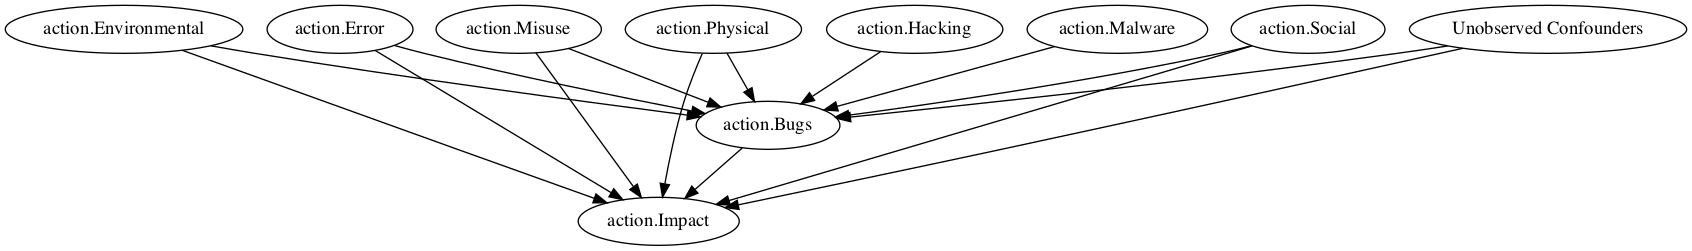

In [68]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

We get a causal graph. Now identification and estimation is done. 

In [69]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'action.Error', 'action.Physical', 'action.Environmental', 'action.Misuse', 'action.Social']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['action.Malware', 'action.Hacking']


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(action.Impact|action.Error,action.Physical,action.Env
daction.Bugs                                                                  

                                        
ironmental,action.Misuse,action.Social))
                                        
Estimand assumption 1, Unconfoundedness: If U→action.Bugs and U→action.Impact then P(action.Impact|action.Bugs,action.Error,action.Physical,action.Environmental,action.Misuse,action.Social,U) = P(action.Impact|action.Bugs,action.Error,action.Physical,action.Environmental,action.Misuse,action.Social)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(action.Impact, action.Malware)/Derivative(action.Bugs, 
action.Malware))
Estimand assumption 1, As-if-random: If U→→action.Impact then ¬(U →→action.Malware,action.Hacking)
Estima

In [73]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, df[data_dict['action.Bugs']], df[data_dict['action.Impact']])
# I think the issue is our data isn't giving us a linear plot... this is linear regression after all

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: action.Impact~action.Bugs+action.Error+action.Physical+action.Environmental+action.Misuse+action.Social


Causal Estimate is -0.42556590661751975


AttributeError: module 'dowhy' has no attribute 'plotter'

In [75]:
print("DoWhy estimate is " + str(estimate.value))
rvar = 1 if np.random.uniform() >0.5 else 0
print ("Actual true causal effect was {0}".format(rvar))

DoWhy estimate is -0.42556590661751975
Actual true causal effect was 1


In [70]:
#identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
#print(identified_estimand)

## Method 1: Stratification

In [71]:
#causal_estimate = model.estimate_effect(identified_estimand,
#        method_name="backdoor.propensity_score_stratification")
#print(causal_estimate)
#print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: action.Impact~action.Bugs+action.Error+action.Physical+action.Environmental+action.Misuse+action.Social


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(action.Impact|action.Error,action.Physical,action.Env
daction.Bugs                                                                  

                                        
ironmental,action.Misuse,action.Social))
                                        
Estimand assumption 1, Unconfoundedness: If U→action.Bugs and U→action.Impact then P(action.Impact|action.Bugs,action.Error,action.Physical,action.Environmental,action.Misuse,action.Social,U) = P(action.Impact|action.Bugs,action.Error,action.Physical,action.Environmental,action.Misuse,action.Social)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(action.Impact, action.Malware)/Derivative(action.Bugs, 
action.Malware))
Estimand assumption 1, As-if-random: If U→→action.Impact then

/Users/ethanpaek/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ethanpaek/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data['propensity_score'] = propensity_score_model.predict_proba(self._observed_common_causes)[:,1]
/Users/ethanpaek/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

## Method 2: Matching

In [72]:
#causal_estimate_match = model.estimate_effect(identified_estimand,
#        method_name="backdoor.propensity_score_matching")
#print(causal_estimate_match)
#print("Causal Estimate is " + str(causal_estimate_match.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: action.Impact~action.Bugs+action.Error+action.Physical+action.Environmental+action.Misuse+action.Social


*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(action.Impact|action.Error,action.Physical,action.Env
daction.Bugs                                                                  

                                        
ironmental,action.Misuse,action.Social))
                                        
Estimand assumption 1, Unconfoundedness: If U→action.Bugs and U→action.Impact then P(action.Impact|action.Bugs,action.Error,action.Physical,action.Environmental,action.Misuse,action.Social,U) = P(action.Impact|action.Bugs,action.Error,action.Physical,action.Environmental,action.Misuse,action.Social)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(action.Impact, action.Malware)/Derivative(action.Bugs, 
action.Malware))
Estimand assumption 1, As-if-random: If U→→action.Impact then

/Users/ethanpaek/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:51: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
